In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_df = pd.read_csv('/kaggle/input/market-sales-data/supermarket_sales new.csv')
sales_df

,Gender,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.4150
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.6520
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.6260
...,...,...,...,...,...,...,...,...,...
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920


In [3]:
sales_df.shape

(1000, 9)

In [4]:
sales_df.columns

Index(['Gender', 'Invoice ID', 'Branch', 'City', 'Customer type',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%'],
      dtype='object')

In [5]:
sales_df.columns = ['Gender', 'Invoice_ID', 'Branch', 'City', 'CustomerType',
       'Product_Line', 'UnitPrice', 'Quantity', 'Tax_5%']

In [6]:
sales_df.columns

Index(['Gender', 'Invoice_ID', 'Branch', 'City', 'CustomerType',
       'Product_Line', 'UnitPrice', 'Quantity', 'Tax_5%'],
      dtype='object')

In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        1000 non-null   object 
 1   Invoice_ID    1000 non-null   object 
 2   Branch        1000 non-null   object 
 3   City          1000 non-null   object 
 4   CustomerType  1000 non-null   object 
 5   Product_Line  1000 non-null   object 
 6   UnitPrice     1000 non-null   float64
 7   Quantity      1000 non-null   int64  
 8   Tax_5%        1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


## Data Cleaning

In [8]:
checking_nan = sales_df[sales_df.isna().any(axis=1)]
checking_nan.sum()

Gender            0
Invoice_ID        0
Branch            0
City              0
CustomerType      0
Product_Line      0
UnitPrice       0.0
Quantity          0
Tax_5%          0.0
dtype: object

In [9]:
duplicates = sales_df.duplicated()
duplicates.sum()

0

In [10]:
sales_df.head()

,Gender,Invoice_ID,Branch,City,CustomerType,Product_Line,UnitPrice,Quantity,Tax_5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


In [11]:
sales_df.tail()

,Gender,Invoice_ID,Branch,City,CustomerType,Product_Line,UnitPrice,Quantity,Tax_5%
995,Male,745-74-0715,A,Yangon,Normal,Electronic accessories,58.03,2,5.8030
996,Male,690-01-6631,B,Mandalay,Normal,Fashion accessories,17.49,10,8.7450
997,Male,233-67-5758,C,Naypyitaw,Normal,Health and beauty,40.35,1,2.0175
998,Male,727-02-1313,A,Yangon,Member,Food and beverages,31.84,1,1.5920
999,Male,347-56-2442,A,Yangon,Normal,Home and lifestyle,65.82,1,3.2910


In [12]:
sales_df.describe() 

,UnitPrice,Quantity,Tax_5%
count,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392
std,26.494628,2.923431,100.551612
min,10.080000,1.000000,1.066000
25%,32.875000,3.000000,6.222500
50%,55.230000,5.000000,12.404000
75%,77.935000,8.000000,27.226250
max,99.960000,10.000000,985.000000


## Data Visualization

In [13]:
branch_count = sales_df.Branch.value_counts()
branch_count

Branch
A    340
B    332
C    328
Name: count, dtype: int64

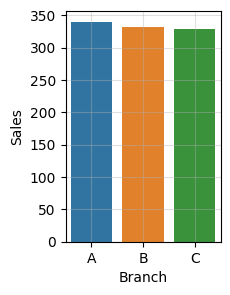

In [14]:
plt.figure(figsize=(2,3))
plt.xlabel("Branch")
plt.ylabel("Sales")
sns.barplot(x=branch_count.index, y=branch_count.values)
plt.grid(alpha=0.4)

In [15]:
city = sales_df.City.value_counts()
city

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Yangon'), Text(1, 0, 'Mandalay'), Text(2, 0, 'Naypyitaw')])

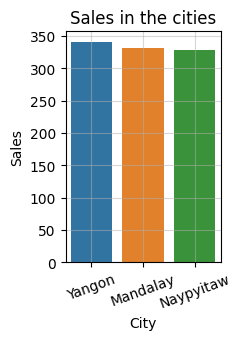

In [16]:
plt.figure(figsize=(2,3))
plt.title("Sales in the cities")
plt.xlabel("City")
plt.ylabel("Sales")
sns.barplot(x=city.index, y=city.values)
plt.grid(alpha=0.5)
plt.xticks(rotation=20)

In [17]:
customer_type = sales_df.CustomerType.value_counts()
customer_type

CustomerType
Member    501
Normal    499
Name: count, dtype: int64

<Axes: title={'center': 'Type of the customer(Member/Normal)'}, xlabel='CustomerType', ylabel='Sales'>

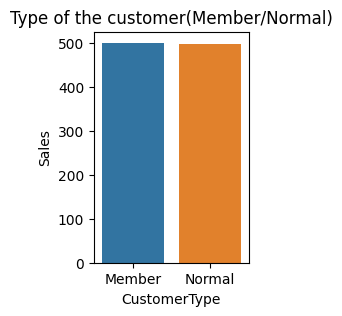

In [18]:
plt.figure(figsize=(2,3))
plt.title("Type of the customer(Member/Normal)")
plt.ylabel('Sales')
sns.barplot(x=customer_type.index, y=customer_type.values)

In [19]:
product_category = sales_df.Product_Line.value_counts()
product_category

Product_Line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Fashion accessories'),
  Text(1, 0, 'Food and beverages'),
  Text(2, 0, 'Electronic accessories'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Home and lifestyle'),
  Text(5, 0, 'Health and beauty')])

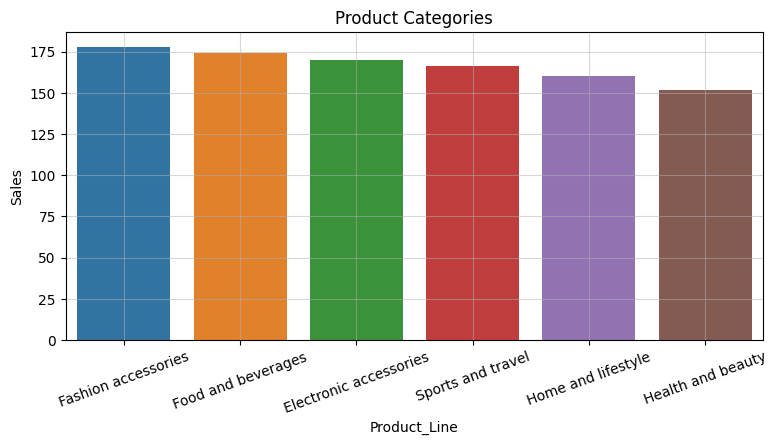

In [20]:
plt.figure(figsize=(9, 4))
plt.title("Product Categories")
plt.ylabel("Sales")
sns.barplot(x=product_category.index, y=product_category.values)
plt.grid(alpha=0.5)
plt.xticks(rotation=20)